In [ ]:
cd ..

In [2]:
from regression_pipeline import data_preparation as prep
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
# Ignore future warnings that often pop up
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Exploratory data analysis on Boston housing data
df = prep.load_dataset("datasets/boston_housing.csv")
prep.prepare_data(df)
display(df.head())
y = df["MEDV"]
x = df.drop(columns="MEDV")
x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


<Figure size 432x288 with 0 Axes>

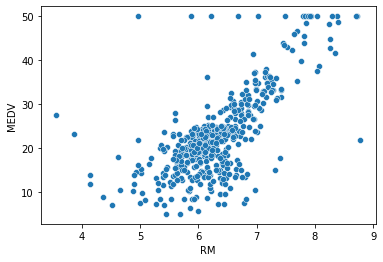

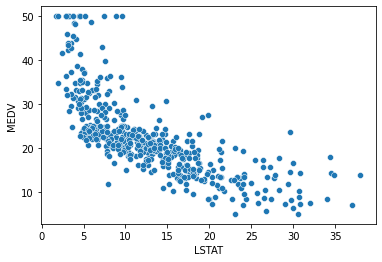

<Figure size 432x288 with 0 Axes>

In [4]:
# Plot the distribution of each variable in relation with the target, and look for correlated variable
# There are 13 variables, so we will display only the plots of those we found interesting : RM and LSTAT
sb.scatterplot(df["RM"], y)
plt.figure()
sb.scatterplot(df["LSTAT"], y)
plt.figure()

We can see that there is some approximation of linear dependency between RM and MEDV, and also an inverse linear dependency between LSTAT and MEDV.
- RM is the average number of rooms per dwelling, it seems logical that more room -> more value.
- LSTAT is the percentage of the population that is of lower economic status. Modest people live in affordable houses.


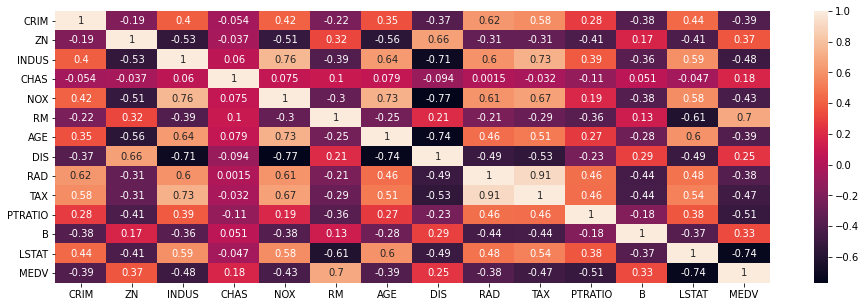

In [5]:
# PLot the correlation of variables
plt.figure(figsize=(16,5))
fig = sb.heatmap(df.corr(),annot=True)


From this correlation map we can see that the other variables are interesting (absolute correlation > .4) aswell, notably ZN, INDUS, NOX, AGE, TAX and PTRATIO. In other words, almost all variables are relevant to the problem